In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:
dfw = pd.read_csv('avg_wages.csv')
dfw

,LOCATION,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,AUT,50524.506564,50814.325436,51677.710303,52578.272037,52334.294580,51755.116093,52070.667736,52128.135527,52309.655188,52686.043960,53169.977860,53136.352960,53325.486022,53690.031378,53131.847260
1,BEL,53327.449932,53224.860383,53452.929608,54193.829082,53969.024719,54520.140610,54950.872490,55503.367518,55808.797932,55427.286365,55525.989944,55130.181974,55387.695298,56021.805354,54326.598175
2,CZE,22861.847008,23545.285901,23672.731508,23578.221573,24309.372522,24508.119622,24557.712349,24404.413629,24920.538327,25660.226169,26574.905825,27930.690363,29420.908126,30354.848712,29884.588816
3,DEU,46546.461494,46415.410186,46632.728469,46645.963088,47054.100469,48025.575290,48682.548875,49158.707242,50001.028820,51171.531009,51901.819556,52454.146078,53220.549493,54041.356470,53744.998601
4,DNK,51745.235763,52309.176187,53017.211202,54302.633627,54928.317132,54643.797654,54570.075681,54924.954335,55975.891349,56959.843690,57043.390343,57355.115156,57794.204720,57967.313949,58429.652139
5,ESP,37646.385919,38053.431338,39398.445985,41882.821712,41485.921779,40743.497728,39605.723163,39607.549142,39484.140196,40072.200986,39844.865487,39325.943691,39032.639352,39054.676154,37922.202482
6,EST,19269.651934,22405.138437,22692.854379,22216.139281,21990.540191,21483.029772,21807.708787,22326.710788,23528.107980,24633.060400,24932.283569,26417.358199,27919.835265,29948.404381,30720.263072
7,FIN,43246.501133,43831.342289,44204.269113,44586.366558,45211.043445,45233.454496,45280.204118,44836.441529,44837.444518,45194.177609,45588.358260,45338.756489,45770.842268,46248.576246,46229.570199
8,FRA,42027.712821,42184.566829,42102.296732,43441.638501,44324.951161,44255.679231,44552.469596,44926.693888,45236.771537,45679.677009,46214.257042,46852.352981,46866.520015,47112.389158,45580.704530
9,GRC,32945.904206,32951.876805,32440.716207,33973.931664,32421.798287,30363.428385,28597.444592,26728.894496,26622.238456,26885.951672,26267.596368,26418.339183,26680.286876,27010.039606,27207.323989


In [3]:
dfe = pd.read_csv('employment.csv')
dfe

,Year,AUT,BEL,CZE,DEU,DNK,ESP,EST,FIN,FRA,...,ITA,LTU,LUX,LVA,NLD,POL,PRT,SVK,SVN,SWE
0,Y2006,68.575,61.000,65.275,67.15000,77.375,65.025,68.425,69.350,64.150,...,58.325,63.625,63.600,65.900,71.575,54.450,67.625,59.425,66.550,73.125
1,Y2007,69.875,62.025,66.075,68.97500,77.000,65.800,69.725,70.300,64.725,...,58.575,65.000,64.150,68.125,73.450,57.025,67.600,60.700,67.750,74.175
2,Y2008,70.825,62.400,66.550,70.10000,76.325,64.475,70.075,71.050,65.300,...,58.650,64.400,63.425,68.225,74.925,59.225,68.025,62.250,68.575,74.325
3,Y2009,70.325,61.600,65.375,69.37500,73.525,59.950,64.200,67.900,64.425,...,56.900,59.875,65.200,60.050,76.175,57.175,62.975,61.850,67.075,71.650
4,Y2010,70.775,62.025,64.975,70.30000,71.800,58.850,61.950,67.150,64.375,...,56.250,57.550,65.200,58.200,75.450,56.975,62.250,60.425,65.525,71.600
5,Y2011,71.100,61.925,65.725,71.77500,71.625,58.025,65.700,68.000,64.300,...,56.350,60.200,64.625,60.575,75.700,57.450,61.850,61.000,63.825,73.100
6,Y2012,71.425,61.825,66.550,72.05000,71.025,55.750,67.975,68.450,64.375,...,56.075,62.025,65.850,62.775,75.900,58.000,59.325,61.375,63.575,73.275
7,Y2013,71.400,61.800,67.725,72.52500,70.775,54.825,69.175,68.075,64.375,...,54.950,63.725,65.725,64.850,75.100,58.425,58.825,61.575,62.775,73.950
8,Y2014,71.075,61.900,68.975,72.80000,71.100,56.000,70.225,67.950,64.525,...,55.275,65.650,66.625,66.125,74.650,60.200,61.200,62.700,63.400,74.425
9,Y2015,71.100,61.800,70.225,73.00000,71.975,57.800,72.075,67.550,64.700,...,56.025,67.250,66.150,68.050,75.650,61.600,62.800,64.525,64.650,75.025


In [4]:
df1=dfw.melt(id_vars="LOCATION", value_vars=dfw.columns[1:], var_name="Year", value_name="Wages")

In [5]:
df1.head()

,LOCATION,Year,Wages
0,AUT,Y2006,50524.506564
1,BEL,Y2006,53327.449932
2,CZE,Y2006,22861.847008
3,DEU,Y2006,46546.461494
4,DNK,Y2006,51745.235763


In [6]:
df1["Year"]=df1["Year"].apply(lambda x: x[1:])

In [7]:
df1.head()

,LOCATION,Year,Wages
0,AUT,2006,50524.506564
1,BEL,2006,53327.449932
2,CZE,2006,22861.847008
3,DEU,2006,46546.461494
4,DNK,2006,51745.235763


In [8]:
df2=dfe.melt(id_vars="Year", value_vars=dfe.columns[1:], var_name="LOCATION", value_name="Emprate")

In [9]:
df2["Year"]=df2["Year"].apply(lambda x: x[1:])

In [10]:
df2.head()

,Year,LOCATION,Emprate
0,2006,AUT,68.575
1,2007,AUT,69.875
2,2008,AUT,70.825
3,2009,AUT,70.325
4,2010,AUT,70.775


In [11]:
df=df1.merge(df2, on=["Year", "LOCATION"])

In [12]:
df.head()

,LOCATION,Year,Wages,Emprate
0,AUT,2006,50524.506564,68.575
1,BEL,2006,53327.449932,61.000
2,CZE,2006,22861.847008,65.275
3,DEU,2006,46546.461494,67.150
4,DNK,2006,51745.235763,77.375


<AxesSubplot:xlabel='Wages', ylabel='Emprate'>

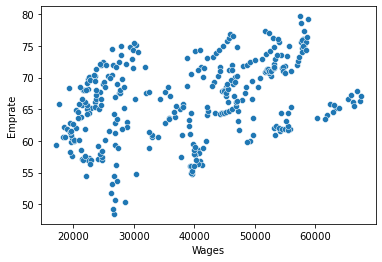

In [13]:
sns.scatterplot(x="Wages", y="Emprate", data=df)

In [14]:
from sklearn.cluster import KMeans

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
model=KMeans(n_clusters=4, init="k-means++")

In [17]:
model.fit(df[["Wages", "Emprate"]])

KMeans(n_clusters=4)

In [18]:
model.cluster_centers_

array([[24145.2098079 ,    64.36811024],
       [56777.39872797,    70.119305  ],
       [38411.62828723,    62.93870968],
       [46411.73828622,    68.63134921]])

In [19]:
model.labels_

array([3, 1, 0, 3, 1, 2, 0, 3, 2, 2, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2,
       3, 1, 0, 3, 1, 2, 0, 3, 2, 2, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2,
       1, 1, 0, 3, 1, 2, 0, 3, 2, 2, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2,
       1, 1, 0, 3, 1, 2, 0, 3, 3, 2, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2,
       1, 1, 0, 3, 1, 2, 0, 3, 3, 2, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2,
       1, 1, 0, 3, 1, 2, 0, 3, 3, 0, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2,
       1, 1, 0, 3, 1, 2, 0, 3, 3, 0, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 3,
       1, 1, 0, 3, 1, 2, 0, 3, 3, 0, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 3,
       1, 1, 0, 3, 1, 2, 0, 3, 3, 0, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 3,
       1, 1, 0, 3, 1, 2, 0, 3, 3, 0, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 3,
       1, 1, 0, 1, 1, 2, 0, 3, 3, 0, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 3,
       1, 1, 0, 1, 1, 2, 0, 3, 3, 0, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 3,
       1, 1, 0, 1, 1, 2, 0, 3, 3, 0, 0, 3, 2, 0, 1, 0, 1, 0, 0, 0, 2, 3,
       1, 1, 0, 1, 1, 2, 0, 3, 3, 0, 0, 3, 2, 0, 1,

In [20]:
df["cluster"]=model.labels_

In [21]:
df.head()

,LOCATION,Year,Wages,Emprate,cluster
0,AUT,2006,50524.506564,68.575,3
1,BEL,2006,53327.449932,61.000,1
2,CZE,2006,22861.847008,65.275,0
3,DEU,2006,46546.461494,67.150,3
4,DNK,2006,51745.235763,77.375,1


<AxesSubplot:xlabel='Wages', ylabel='Emprate'>

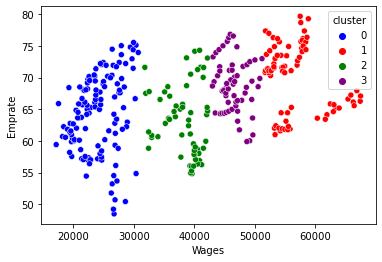

In [22]:
hue_color={0: "blue", 1: "red", 2:"green", 3: "purple"}
sns.scatterplot(x="Wages", y="Emprate",hue="cluster" ,data=df, palette=hue_color)

In [23]:
pd.crosstab(df["LOCATION"], df["cluster"])

cluster,0,1,2,3
LOCATION,,,,
AUT,0,13,0,2
BEL,0,15,0,0
CZE,15,0,0,0
DEU,0,5,0,10
DNK,0,15,0,0
ESP,0,0,15,0
EST,15,0,0,0
FIN,0,0,0,15
FRA,0,0,3,12


In [24]:
df5=df.groupby("LOCATION").mean().reset_index().drop("cluster", axis=1)
df5

,LOCATION,Wages,Emprate
0,AUT,52355.494860,71.233333
1,BEL,54718.055292,62.528333
2,CZE,25745.627363,69.158333
3,DEU,49713.128343,72.178719
4,DNK,55464.454195,73.465000
5,ESP,39544.029674,60.253333
6,EST,24152.739096,70.066667
7,FIN,45042.489885,69.160000
8,FRA,44757.245402,64.961667
9,GRC,29167.718053,55.025000


In [72]:
model2= KMeans(n_clusters=2, init="k-means++")

In [73]:
df6=df5.drop("LOCATION", axis=1)

In [74]:
model2.fit(df6)

KMeans(n_clusters=2)

In [75]:
model2.labels_

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [76]:
df5["cluster"]=model2.labels_

In [77]:
df5

,LOCATION,Wages,Emprate,cluster
0,AUT,52355.494860,71.233333,1
1,BEL,54718.055292,62.528333,1
2,CZE,25745.627363,69.158333,0
3,DEU,49713.128343,72.178719,1
4,DNK,55464.454195,73.465000,1
5,ESP,39544.029674,60.253333,1
6,EST,24152.739096,70.066667,0
7,FIN,45042.489885,69.160000,1
8,FRA,44757.245402,64.961667,1
9,GRC,29167.718053,55.025000,0


<AxesSubplot:xlabel='Wages', ylabel='Emprate'>

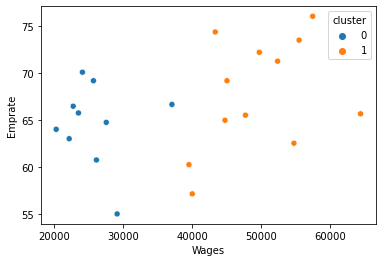

In [78]:
sns.scatterplot(x="Wages", y="Emprate",hue="cluster" ,data=df5)

In [79]:
range_n_clusters=[2,3,4,5,6]

In [80]:
sse=[]
for i in range(1,10):
    model2= KMeans(n_clusters=i, init="k-means++")
    model2.fit(df5[["Wages", "Emprate"]])
    sse.append(model2.inertia_)

C:\Users\Temple\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


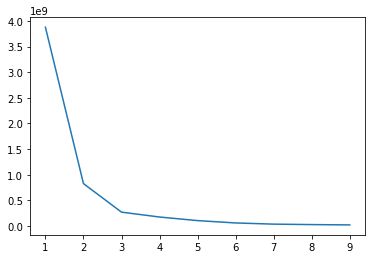

In [81]:
plt.plot(range(1,10), sse)

For n_clusters = 2 The average silhouette_score is : 0.6588368211487242
For n_clusters = 3 The average silhouette_score is : 0.6586647785164277
For n_clusters = 4 The average silhouette_score is : 0.627442887473225
For n_clusters = 5 The average silhouette_score is : 0.6207536741517046
For n_clusters = 6 The average silhouette_score is : 0.5479459887880966


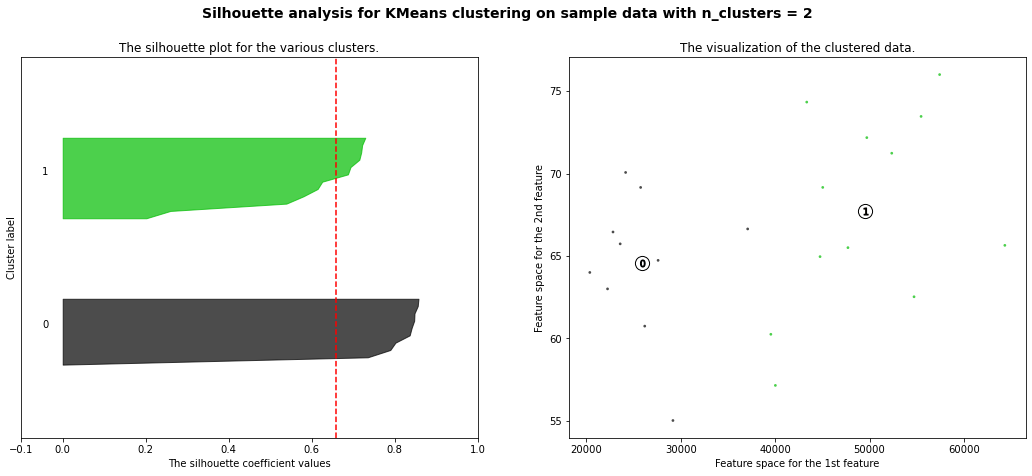

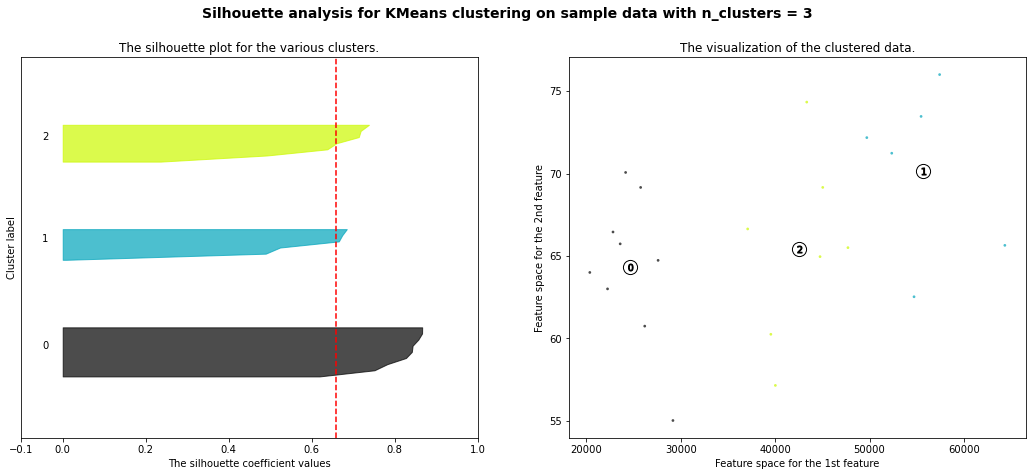

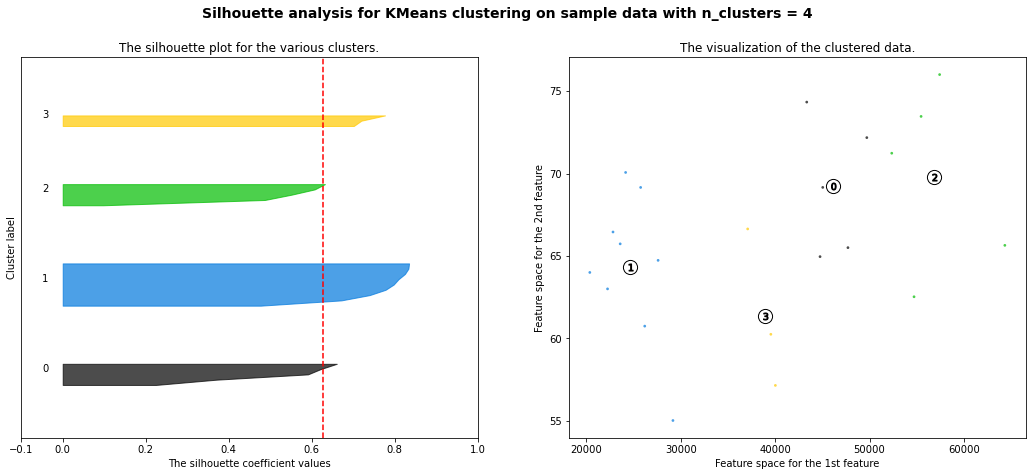

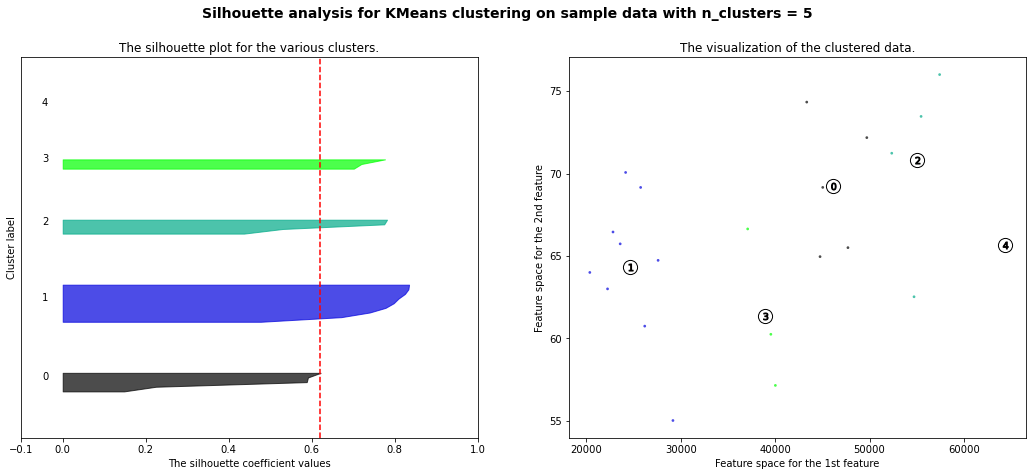

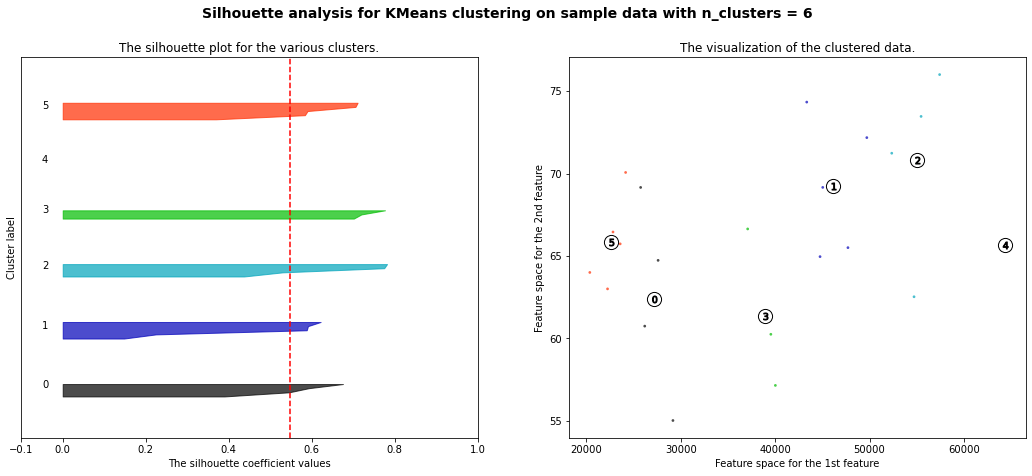

In [85]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df6) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df6)

    silhouette_avg = silhouette_score(df6, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(df6, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
    
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df6["Wages"],df6["Emprate"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
 
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

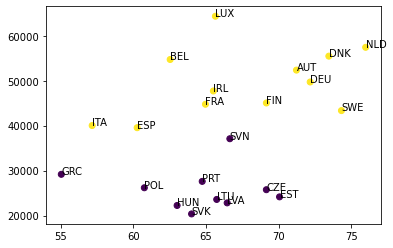

In [101]:
plt.scatter(df5['Emprate'], df5['Wages'], c=df5['cluster'])
for location, Wages, Emprate,_ in df5.itertuples(None,None):
    plt.text(x=Emprate, y=Wages, s=location)